#**Independencies**

In [ ]:
! pip install transformers

In [ ]:
! sudo apt install tesseract-ocr
! pip install pytesseract

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
#
! pip install datasets

In [ ]:
#
import requests, zipfile, io

def download_data():
    url = "https://www.dropbox.com/s/kuw05qmc4uy474d/RVL_CDIP_one_example_per_class.zip?dl=1"
    r = requests.get(url)
    z = zipfile.ZipFile(io.BytesIO(r.content))
    z.extractall()

download_data()

In [ ]:
from PIL import Image, ImageDraw, ImageFont

image = Image.open("/content/730f1550-32529ff3-zzzz35.pdf_0.jpg")
image = image.convert("RGB")
image

In [ ]:
import pytesseract
import numpy as np

ocr_df = pytesseract.image_to_data(image, output_type='data.frame')
ocr_df = ocr_df.dropna().reset_index(drop=True)
float_cols = ocr_df.select_dtypes('float').columns
ocr_df[float_cols] = ocr_df[float_cols].round(0).astype(int)
ocr_df = ocr_df.replace(r'^\s*$', np.nan, regex=True)
words = ' '.join([word for word in ocr_df.text if str(word) != 'nan'])
words

"Chedly MAJOULI Ingénieur Génie Civil @ Rue 20 Mars El fajja Mornaguia &@ chedly.majouli@outlook.com Mon esprit créatif, doublé de mes connaissances techniques, Fait de moi un ingénieur génie civil aguerri. Je suis, en outre, apte a gérer une équipe. J'ai +216 22811476 Uhabitude de prendre des décisions, méme sous une forte pression. De novembre 2022 a janvier 2023 De juillet 2022 4 octobre 2022 De Février 2022 a juin 2022 De juin 20214 septembre 2021 De juillet 2019 4 septembre 2019 De février 2019 a mai 2019 De Février 2022 a décembre 2022 De septembre 2019 4 juillet 2022 De septembre 2016 a juin 2019 De septembre 2015 4 juin 2016 Janvier 2022 Septembre 2021 De juin 20214 septembre 2021 D'avril 2021 a mai 2021 De septembre 2020 4 juin 2022 Expériences professionnelles e > o Agent Back-Office PhoneAct Charguia 2 Stage Projet Fin d'études Bulgin Cité Ettahrir L'application de la méthode SMED pour diminuer les temps d'arréts des machines diiau changement de série. (Changement moule d'un

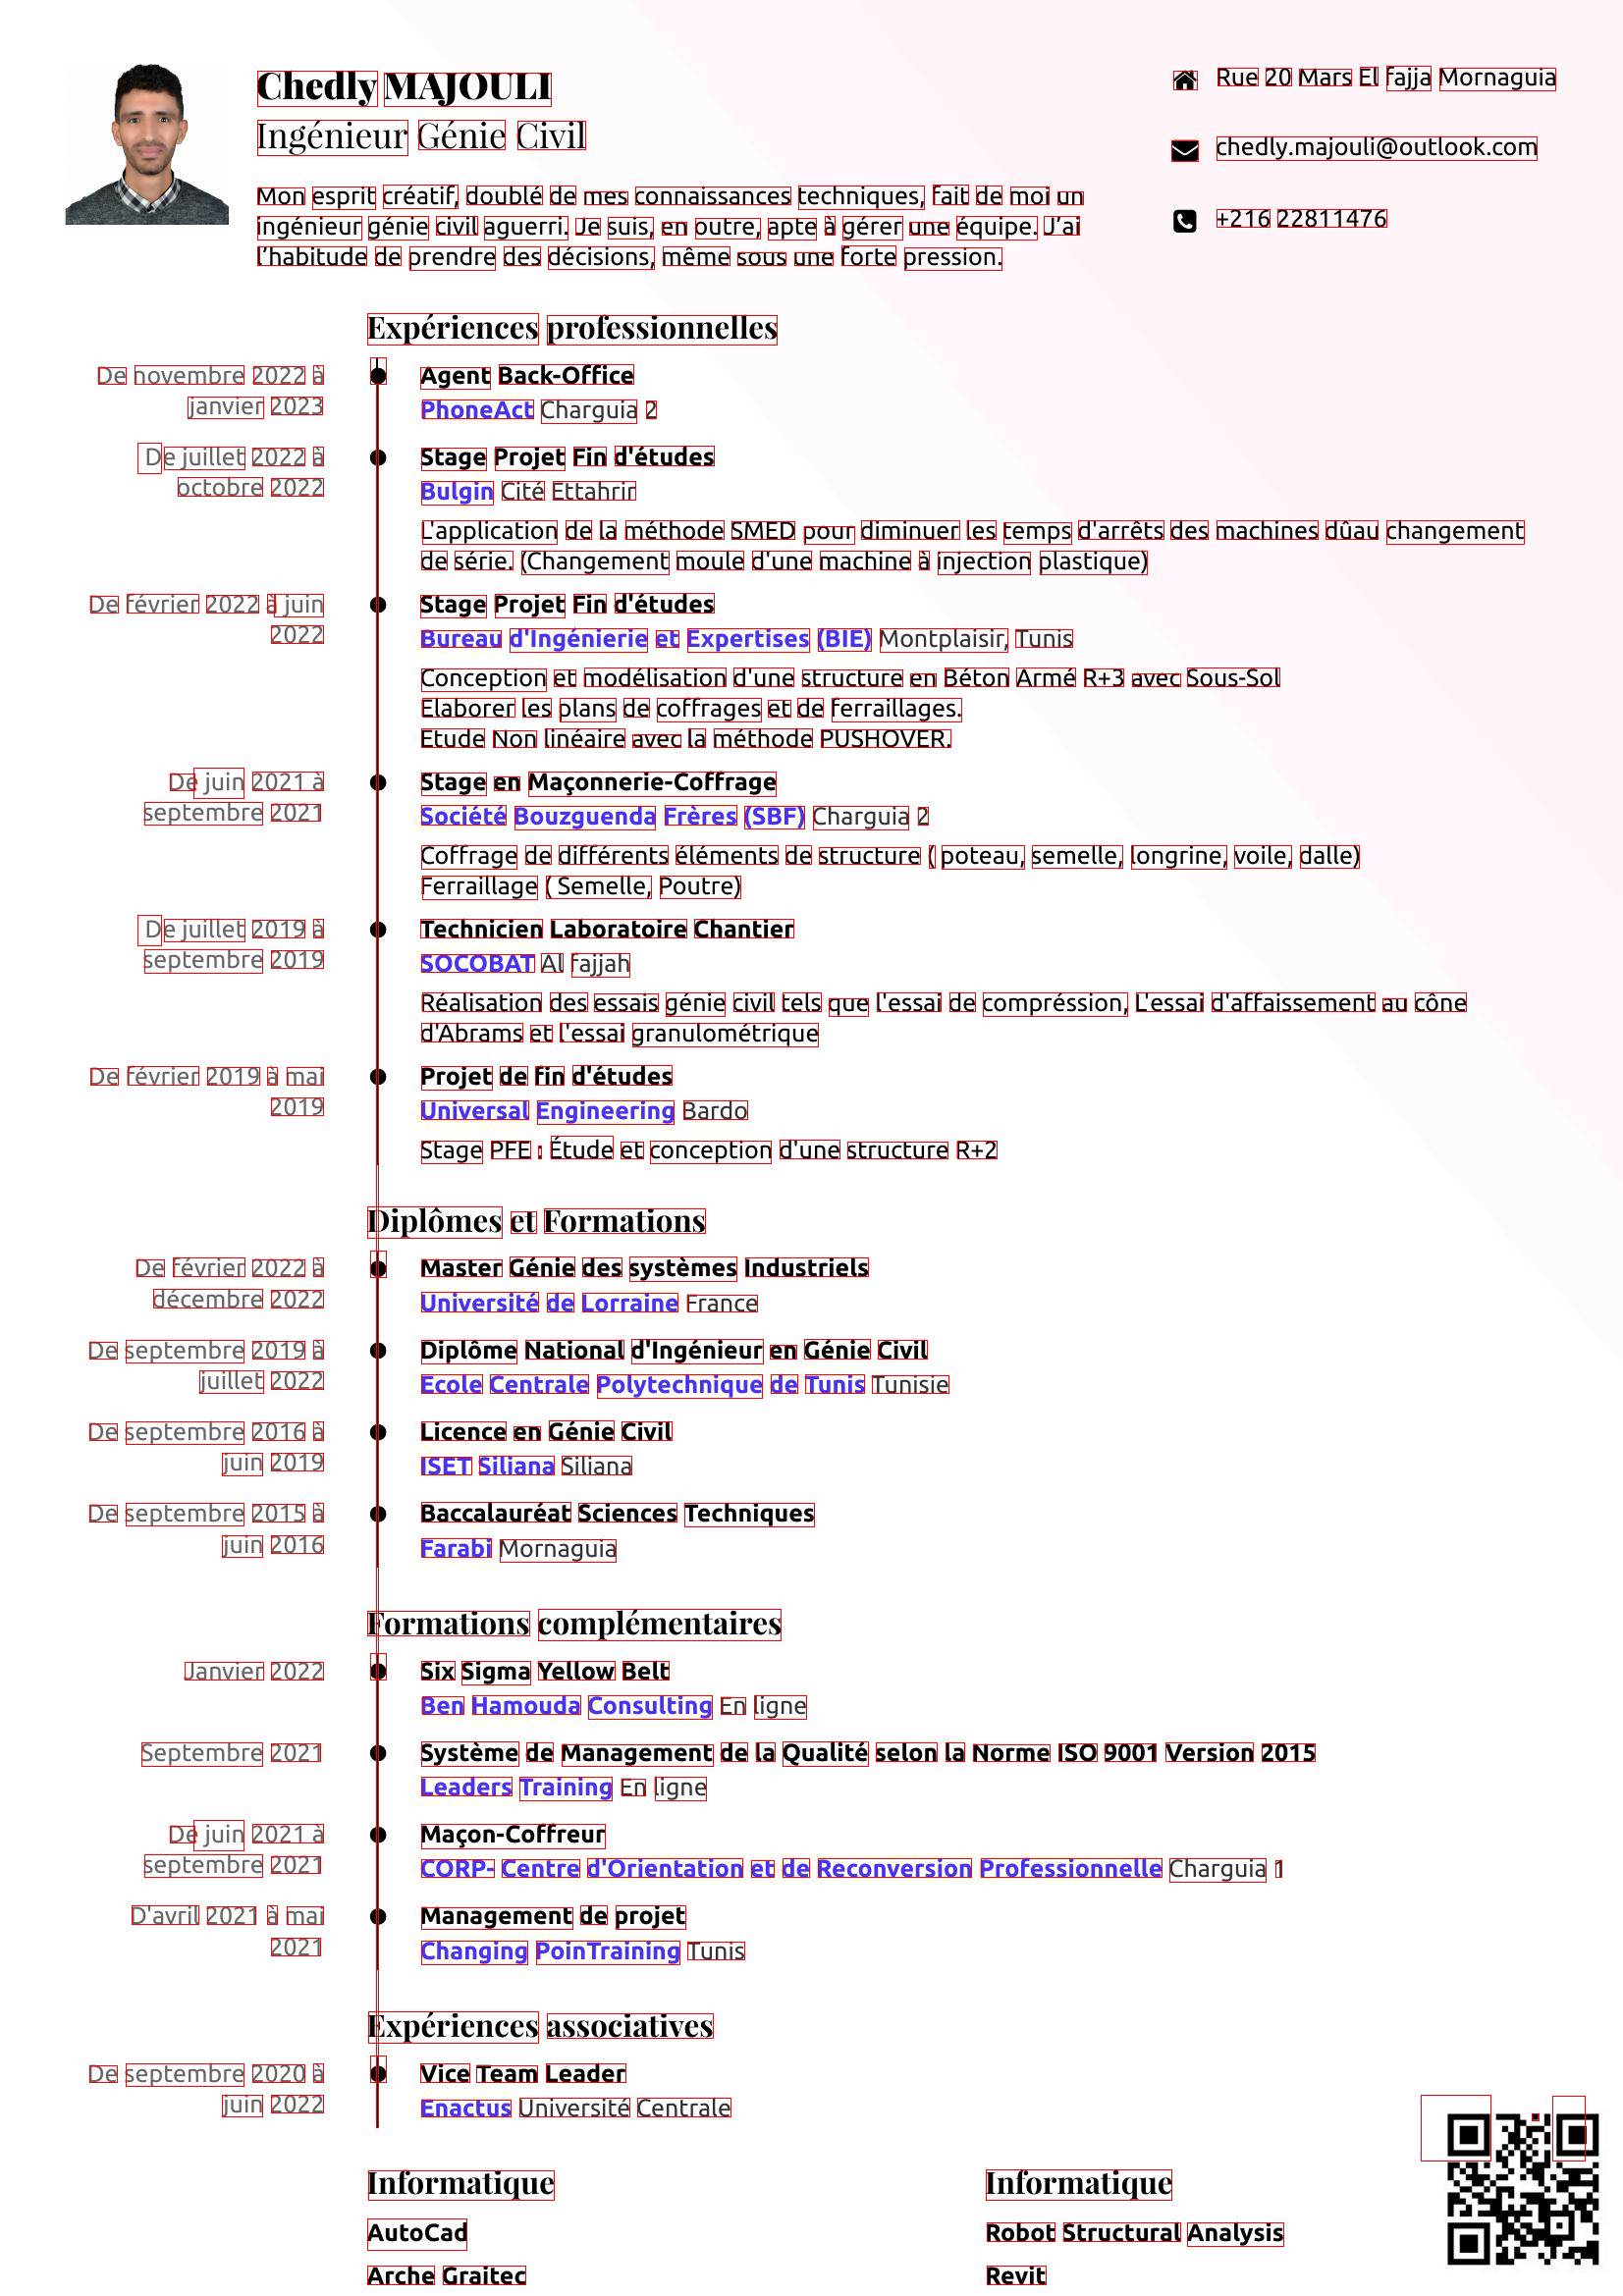

In [ ]:
coordinates = ocr_df[['left', 'top', 'width', 'height']]
actual_boxes = []
for idx, row in coordinates.iterrows():
    x, y, w, h = tuple(row) # the row comes in (left, top, width, height) format
    actual_box = [x, y, x+w, y+h] # we turn it into (left, top, left+width, top+height) to get the actual box
    actual_boxes.append(actual_box)

draw = ImageDraw.Draw(image, "RGB")
for box in actual_boxes:
  draw.rectangle(box, outline='red')

image

In [ ]:
!pip install transformers

In [ ]:
import torch
from transformers import LayoutLMv2Tokenizer, LayoutLMv2ForSequenceClassification, Trainer, TrainingArguments

In [ ]:
# Load the LayoutLM v3 tokenizer and model
tokenizer = LayoutLMv2Tokenizer.from_pretrained("microsoft/layoutlmv2-base-uncased")
model = LayoutLMv2ForSequenceClassification.from_pretrained("microsoft/layoutlmv2-base-uncased", num_labels=2)

In [ ]:
# Load and preprocess the resumes dataset
train_dataset = # load and preprocess train dataset
val_dataset = # load and preprocess validation dataset

In [ ]:
# Fine-tune the model on the dataset
training_args = TrainingArguments(
    output_dir='./results',
    num_train_epochs=3,
    per_device_train_batch_size=16,
    per_device_eval_batch_size=64,
    warmup_steps=500,
    weight_decay=0.01,
    logging_dir='./logs',
    logging_steps=10,
    evaluation_strategy='steps',
    eval_steps=50,
    save_total_limit=1,
    save_steps=50,
    learning_rate=5e-5,
)

trainer = Trainer(
    model=model,
    args=training_args,
    train_dataset=train_dataset,
    eval_dataset=val_dataset,
)

trainer.train()

In [ ]:
# Evaluate the fine-tuned model on a validation set
trainer.evaluate()

In [ ]:
# Save the fine-tuned model to your Google Drive
torch.save(model.state_dict(), '/content/drive/MyDrive/layoutlmv3_resumes_model.pt')